##### Adapted from: 
##### https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
##### https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [36]:
import pandas as pd
import numpy as np

# DEFINE THE DATASET
sales_data = pd.read_csv('..\\data\\train.csv')
sales_data = sales_data.select_dtypes(include=[np.number])
sales_data = sales_data.dropna(axis=0)

# drop columns by Name
sales_data = sales_data.drop(['Unnamed: 0', 'FID', 'GPID', 'pop_chng_p'], axis=1)

# convert negative values to absolute 
#sales_data['LON'] = sales_data['LON'].abs()

# define X and y
X = sales_data.loc[:, sales_data.columns != 'SELL_PRICE']  #independent columns
y = sales_data.SELL_PRICE   #target column i.e. price range


### Classification and Regression Trees - DecisionTreeRegressor

         Specs     Score
23  median_val  0.403333
33        bach  0.079899
57      bs_ave  0.076237
52    other_km  0.064302
51    bylaw_km  0.056273
50     bark_km  0.048436
56      ws_ave  0.045039
0    shp__area  0.032203
11   20_24_pct  0.023371
41     transit  0.018404
43        walk  0.017152
13   15_64_pct  0.016535
55    trees_km  0.012773
34    bach_pct  0.011243
53    total_km  0.010190
49    noise_km  0.009523
22     ave_inc  0.008390
37        doct  0.008326
4     pop_dens  0.008053
21  dwl_chld_p  0.006443


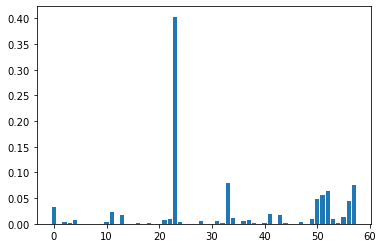

In [47]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


### Classification and Regression Trees - ExtraTreesClassifier

[0.06085057 0.00801721 0.00624711 0.00696747 0.00708175 0.00597178
 0.00755588 0.00681592 0.00685536 0.00657933 0.00728236 0.0075502
 0.00650834 0.00717716 0.00785115 0.00688532 0.00683449 0.00637547
 0.0071821  0.00810584 0.00604778 0.0076595  0.00749593 0.00856528
 0.00876704 0.00700081 0.00784553 0.00768697 0.00754581 0.00744557
 0.00556011 0.00557818 0.0065555  0.00646581 0.00760713 0.00703916
 0.00729318 0.00630533 0.00731223 0.00775389 0.00688458 0.00715442
 0.00807096 0.00661454 0.00780605 0.00519558 0.00615803 0.00765942
 0.00825675 0.07465423 0.07371208 0.07625649 0.07529256 0.07692567
 0.01299735 0.0454018  0.08028338 0.08245058]


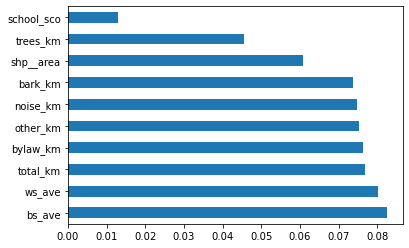

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


### Classification and Regression Trees - Random Forest Regression

         Specs     Score
24     ave_val  0.249518
23  median_val  0.166749
57      bs_ave  0.047766
51    bylaw_km  0.047318
50     bark_km  0.045790
52    other_km  0.037994
49    noise_km  0.034954
0    shp__area  0.032966
56      ws_ave  0.032866
33        bach  0.031749
53    total_km  0.023667
55    trees_km  0.020823
35        mast  0.017843
48  mvrs_3yr_p  0.013107
18   s_d_h_pct  0.011944
22     ave_inc  0.010463
30   rnt_30pls  0.010001
54  school_sco  0.009288
29   own_30pls  0.007408
34    bach_pct  0.007297


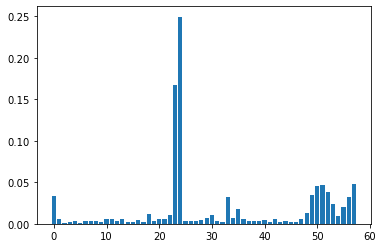

In [49]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Classification and Regression Trees - Random Forest Classifier

         Specs     Score
51    bylaw_km  0.066116
50     bark_km  0.065213
57      bs_ave  0.065163
49    noise_km  0.063540
56      ws_ave  0.062788
52    other_km  0.059902
53    total_km  0.059477
0    shp__area  0.051450
55    trees_km  0.037938
24     ave_val  0.014649
22     ave_inc  0.014453
23  median_val  0.013691
54  school_sco  0.012904
36    mast_pct  0.012521
47  mvrs_1yr_p  0.011971
1        DA_ID  0.011965
34    bach_pct  0.011914
26   owner_pct  0.011906
48  mvrs_3yr_p  0.011772
39  unemployme  0.011315


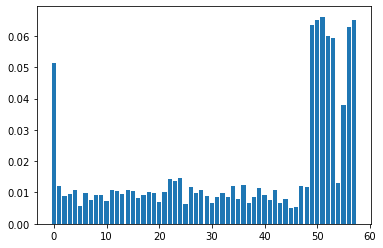

In [41]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Univariate Selection - SelectKBest

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features


         Specs         Score
24     ave_val  6.842942e+06
23  median_val  6.007249e+06
0    shp__area  5.939020e+06
22     ave_inc  9.911132e+05
2     pop_2016  3.303927e+05
32    highr_ed  2.339931e+05
8    15_64_yrs  2.194554e+05
4     pop_dens  1.976449e+05
3     pop_2011  1.912996e+05
40     commute  1.582375e+05
52    other_km  1.480228e+05
53    total_km  1.414658e+05
31     rent_av  1.165330e+05
33        bach  1.135900e+05
7     0_14_yrs  1.065359e+05
25       owner  9.800217e+04
6   dwell_dens  9.711446e+04
16   dwellings  9.572519e+04
20    dwl_chld  6.748352e+04
17       s_d_h  4.906422e+04


### XGBoost Regression

         Specs     Score
24     ave_val  0.346046
23  median_val  0.244949
33        bach  0.057084
30   rnt_30pls  0.023138
54  school_sco  0.022595
27       rentr  0.021244
35        mast  0.020644
37        doct  0.016884
5    land_area  0.015844
13   15_64_pct  0.013418
28   rentr_pct  0.013147
18   s_d_h_pct  0.012035
11   20_24_pct  0.010537
20    dwl_chld  0.010425
34    bach_pct  0.009187
12    0_14_pct  0.008872
48  mvrs_3yr_p  0.008522
44    walk_pct  0.008255
50     bark_km  0.008211
22     ave_inc  0.008140


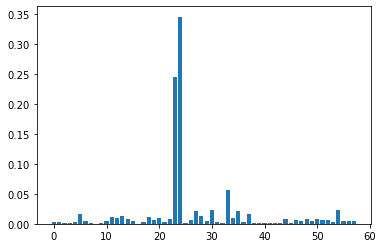

In [43]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor
from matplotlib import pyplot

# define the model
model = XGBRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### XGBoost Classification

C:\Users\Shane\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
         Specs     Score
56  Ave_Rating  0.057602
42     transit  0.038688
15  65_pls_pct  0.037535
35    bach_pct  0.036418
71     TAX_AMT  0.031281
72    LOT_DPTH  0.026527
58   walkscore  0.024706
25     ave_val  0.023750
14   15_64_pct  0.022614
54    total_km  0.022122
24  median_val  0.022079
62  LIST_PRICE  0.020124
39    doct_pct  0.018385
13    0_14_pct  0.018030
7   dwell_dens  0.017667
74         LAT  0.017634
69     ASS_AMT  0.016886
51     bark_km  0.014373
49  mvrs_3yr_p  0.013049
0   Shape__Are  0.012976


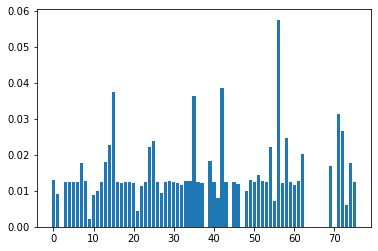

In [15]:
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model = XGBClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Permutation Feature Importance for Regression

         Specs         Score
24     ave_val  3.166433e+10
23  median_val  2.683767e+10
0    shp__area  9.879977e+09
22     ave_inc  2.887976e+09
6   dwell_dens  2.973265e+07
4     pop_dens  2.547171e+07
2     pop_2016  2.159565e+07
31     rent_av  1.581799e+07
3     pop_2011  9.895029e+06
32    highr_ed  5.961111e+06
8    15_64_yrs  3.616064e+06
40     commute  2.779491e+06
7     0_14_yrs  1.882112e+06
16   dwellings  1.776319e+06
25       owner  1.776319e+06
1        DA_ID  0.000000e+00
5    land_area  0.000000e+00
9   65_plus_yr  0.000000e+00
10   20_24_yrs  0.000000e+00
11   20_24_pct  0.000000e+00


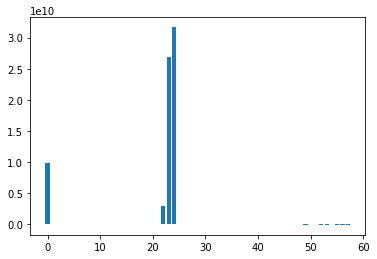

In [44]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsRegressor()

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Permutation Feature Importance for Classification

         Specs         Score
24     ave_val  3.166433e+10
23  median_val  2.683767e+10
0    shp__area  9.879977e+09
22     ave_inc  2.887976e+09
6   dwell_dens  2.973265e+07
4     pop_dens  2.547171e+07
2     pop_2016  2.159565e+07
31     rent_av  1.581799e+07
3     pop_2011  9.895029e+06
32    highr_ed  5.961111e+06
8    15_64_yrs  3.616064e+06
40     commute  2.779491e+06
7     0_14_yrs  1.882112e+06
16   dwellings  1.776319e+06
25       owner  1.776319e+06
1        DA_ID  0.000000e+00
5    land_area  0.000000e+00
9   65_plus_yr  0.000000e+00
10   20_24_yrs  0.000000e+00
11   20_24_pct  0.000000e+00


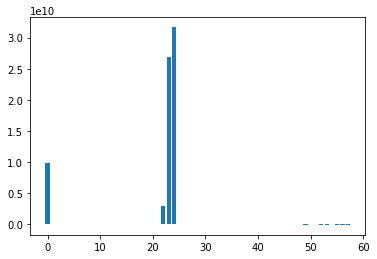

In [46]:
# permutation feature importance with knn for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsClassifier()

# fit the model
model.fit(X, y)

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Feature Selection with Importance

In [25]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 84.55


# =END OF WORKING CODE= 

### Linear Regression Feature Importance
##### This assumes that the input variables have the same scale or have been scaled prior to fitting a model.


In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
